# **Deep Learning Programming with Python**
### Week3: Linear Algebra 101

**Acknowledgement**

Many of Today's contents are adopted from the below resources:

1. https://d2l.ai/chapter_preliminaries/linear-algebra.html
2. https://www.deeplearningbook.org/contents/linear_algebra.html
3. https://hadrienj.github.io/
4. https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html
----


# Linear Algebra


In [1]:
import torch

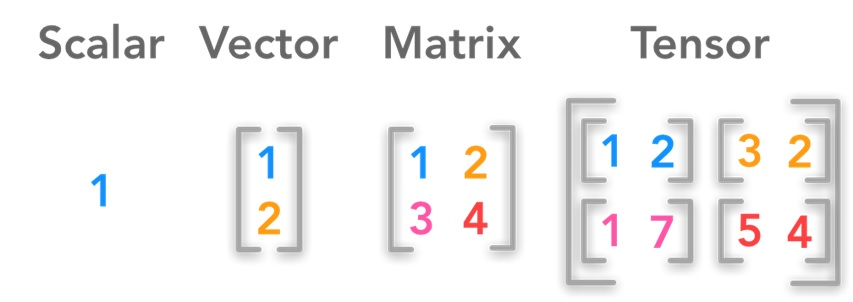

## Scalars


Most everyday mathematics
consists of manipulating
numbers one at a time.
Formally, we call these values *scalars*.
For example, the temperature in Palo Alto
is a balmy $72$ degrees Fahrenheit.
If you wanted to convert the temperature to Celsius
you would evaluate the expression
$c = \frac{5}{9}(f - 32)$, setting $f$ to $72$.
In this equation, the values
$5$, $9$, and $32$ are scalars.
The variables $c$ and $f$
represent unknown scalars.

We denote scalars
by ordinary lower-cased letters
(e.g., $x$, $y$, and $z$)
and the space of all (continuous)
*real-valued* scalars by $\mathbb{R}$.
For expedience, we will skip past
rigorous definitions of *spaces*.
Just remember that the expression $x \in \mathbb{R}$
is a formal way to say that $x$ is a real-valued scalar.
The symbol $\in$ (pronounced "in")
denotes membership in a set.
For example, $x, y \in \{0, 1\}$
indicates that $x$ and $y$ are variables
that can only take values $0$ or $1$.

(**Scalars are implemented as tensors
that contain only one element.**)

Below, we assign two scalars
and perform the familiar addition, multiplication,
division, and exponentiation operations.


In [2]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

## Vectors

For our purposes, [**you can think of vectors
as fixed-length arrays of scalars.**]
As with their code counterparts,
we call these values the *elements* of the vector
(synonyms include *entries* and *components*).
When vectors represent examples from real-world datasets,
their values hold some real-world significance.
For example, if we were training a model to predict
the risk of a loan defaulting,
we might associate each applicant with a vector
whose components correspond to quantities
like their income, length of employment,
or number of previous defaults.
If we were studying heart attack risk,
each vector might represent a patient
and its components might correspond to
their most recent vital signs, cholesterol levels,
minutes of exercise per day, etc.
We denote vectors by bold lowercase letters,
(e.g., $\mathbf{x}$, $\mathbf{y}$, and $\mathbf{z}$).

Vectors are implemented as $1^{\mathrm{st}}$-order tensors.
In general, such tensors can have arbitrary lengths,
subject to memory limitations. Caution: in Python, like in most programming languages, vector indices start at $0$, also known as *zero-based indexing*, whereas in linear algebra subscripts begin at $1$ (one-based indexing).


In [3]:
x = torch.arange(3)
x

tensor([0, 1, 2])

We can refer to an element of a vector by using a subscript.
For example, $x_2$ denotes the second element of $\mathbf{x}$.
Since $x_2$ is a scalar, we do not bold it.
By default, we visualize vectors
by stacking their elements vertically.

$$\mathbf{x} =\begin{bmatrix}x_{1}  \\ \vdots  \\x_{n}\end{bmatrix},$$

Here $x_1, \ldots, x_n$ are elements of the vector.

Later on, we will distinguish between such *column vectors*
and *row vectors* whose elements are stacked horizontally.

Recall that [**we access a tensor's elements via indexing.**]


In [4]:
x[2]

tensor(2)

To indicate that a vector contains $n$ elements,
we write $\mathbf{x} \in \mathbb{R}^n$.

Formally, we call $n$ the *dimensionality* of the vector.

[**In code, this corresponds to the tensor's length**],
accessible via Python's built-in `len` function.


In [5]:
len(x)

3

We can also access the length via the `shape` attribute.
The shape is a tuple that indicates a tensor's length along each axis.

(**Tensors with just one axis have shapes with just one element.**)


In [6]:
x.shape

torch.Size([3])

Oftentimes, the word "dimension" gets overloaded
to mean both the number of axes
and the length along a particular axis.
To avoid this confusion,
we use *order* to refer to the number of axes
and *dimensionality* exclusively to refer
to the number of components.


## Matrices

Just as scalars are $0^{\mathrm{th}}$-order tensors
and vectors are $1^{\mathrm{st}}$-order tensors,
matrices are $2^{\mathrm{nd}}$-order tensors.
We denote matrices by bold capital letters
(e.g., $\mathbf{X}$, $\mathbf{Y}$, and $\mathbf{Z}$),
and represent them in code by tensors with two axes.
The expression $\mathbf{A} \in \mathbb{R}^{m \times n}$
indicates that a matrix $\mathbf{A}$
contains $m \times n$ real-valued scalars,
arranged as $m$ rows and $n$ columns.
When $m = n$, we say that a matrix is *square*.
Visually, we can illustrate any matrix as a table.
To refer to an individual element,
we subscript both the row and column indices, e.g.,
$a_{ij}$ is the value that belongs to $\mathbf{A}$'s
$i^{\mathrm{th}}$ row and $j^{\mathrm{th}}$ column:

$$\mathbf{A}=\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \\ \end{bmatrix}.$$


In code, we represent a matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$
by a $2^{\mathrm{nd}}$-order tensor with shape ($m$, $n$).

[**We can convert any appropriately sized $m \times n$ tensor
into an $m \times n$ matrix**]
by passing the desired shape to `reshape`:


In [7]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

Sometimes, we want to flip the axes.
When we exchange a matrix's rows and columns,
the result is called its *transpose*.
Formally, we signify a matrix $\mathbf{A}$'s transpose
by $\mathbf{A}^\top$ and if $\mathbf{B} = \mathbf{A}^\top$,
then $b_{ij} = a_{ji}$ for all $i$ and $j$.
Thus, the transpose of an $m \times n$ matrix
is an $n \times m$ matrix:

$$
\mathbf{A}^\top =
\begin{bmatrix}
    a_{11} & a_{21} & \dots  & a_{m1} \\
    a_{12} & a_{22} & \dots  & a_{m2} \\
    \vdots & \vdots & \ddots  & \vdots \\
    a_{1n} & a_{2n} & \dots  & a_{mn}
\end{bmatrix}.
$$

In code, we can access any (**matrix's transpose**) as follows:


Matrices are useful for representing datasets.
Typically, rows correspond to individual records
and columns correspond to distinct attributes.



## Tensors

While you can go far in your machine learning journey
with only scalars, vectors, and matrices,
eventually you may need to work with
higher-order [**tensors**].
Tensors (**give us a generic way to describe
extensions to $n^{\mathrm{th}}$-order arrays.**)
We call software objects of the *tensor class* "tensors"
precisely because they too can have arbitrary numbers of axes.
While it may be confusing to use the word
*tensor* for both the mathematical object
and its realization in code,
our meaning should usually be clear from context.
We denote general tensors by capital letters
with a special font face
(e.g., $\mathsf{X}$, $\mathsf{Y}$, and $\mathsf{Z}$)
and their indexing mechanism
(e.g., $x_{ijk}$ and $[\mathsf{X}]_{1, 2i-1, 3}$)
follows naturally from that of matrices.

Tensors will become more important
when we start working with images.
Each image arrives as a $3^{\mathrm{rd}}$-order tensor
with axes corresponding to the height, width, and *channel*.
At each spatial location, the intensities
of each color (red, green, and blue)
are stacked along the channel.
Moreover a collection of images is represented
in code by a $4^{\mathrm{th}}$-order tensor,
where distinct images are indexed
along the first axis.
Higher-order tensors are constructed analogously
to vectors and matrices,
by growing the number of shape components.


In [ ]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

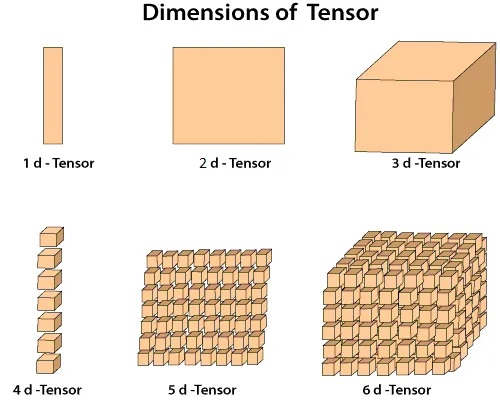

Image from: https://medium.com/mlearning-ai/what-are-tensors-495cf37c18e6

## Basic Properties of Tensor Arithmetic

Scalars, vectors, matrices,
and higher-order tensors
all have some handy properties.

For example, **elementwise** operations
produce outputs that have the
**same shape as their operands**.


In [10]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

The [**elementwise product of two matrices
is called their *Hadamard product***] (denoted $\odot$).


Below, we spell out the entries
of the Hadamard product of two matrices
$\mathbf{A}, \mathbf{B} \in \mathbb{R}^{m \times n}$:



$$
\mathbf{A} \odot \mathbf{B} =
\begin{bmatrix}
    a_{11}  b_{11} & a_{12}  b_{12} & \dots  & a_{1n}  b_{1n} \\
    a_{21}  b_{21} & a_{22}  b_{22} & \dots  & a_{2n}  b_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{m1}  b_{m1} & a_{m2}  b_{m2} & \dots  & a_{mn}  b_{mn}
\end{bmatrix}.
$$


In [11]:
A * B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

[**Adding or multiplying a scalar and a tensor**] produces a result
with the same shape as the original tensor.
Here, each element of the tensor is added to (or multiplied by) the scalar.


In [ ]:
a = 2
X = torch.arange(24).reshape(2, 3, 4) # high <-> low (e.g., layer, row, column)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

## Reduction

Often, we wish to calculate [**the sum of a tensor's elements.**]

To express the sum of the elements in a vector $\mathbf{x}$ of length $n$,
we write $\sum_{i=1}^n x_i$. There's a simple function for it:


In [12]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

To express [**sums over the elements of tensors of arbitrary shape**],

we simply sum over all of its axes.

For example, the sum of the elements
of an $m \times n$ matrix $\mathbf{A}$
could be written $\sum_{i=1}^{m} \sum_{j=1}^{n} a_{ij}$.


In [13]:
A, A.shape, A.sum()

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 torch.Size([2, 3]),
 tensor(15.))

By default, invoking the sum function
*reduces* a tensor along **ALL** of its axes,
eventually producing a scalar.

Our libraries also allow us to [**specify the axes
along which the tensor should be reduced.**]

To sum over all elements along the rows (axis 0),
we specify `axis=0` in `sum`.


Since the input matrix reduces along axis 0
to generate the output vector,
this axis is missing from the shape of the output.


In [15]:
A, A.shape, A.sum(axis=0), A.sum(axis=0).shape

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 torch.Size([2, 3]),
 tensor([3., 5., 7.]),
 torch.Size([3]))

Specifying `axis=1` will reduce the column dimension (axis 1) by summing up elements of all the columns.


In [16]:
A, A.shape, A.sum(axis=1), A.sum(axis=1).shape

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 torch.Size([2, 3]),
 tensor([ 3., 12.]),
 torch.Size([2]))

Reducing a matrix along both rows and columns via summation
is equivalent to summing up all the elements of the matrix.


In [21]:
A.sum(axis=[0, 1]) == A.sum(), A.sum(axis=[0, 1]) # Same as A.sum()

(tensor(True), tensor(15.))

[**A related quantity is the *mean*, also called the *average*.**]

We calculate the mean by dividing the sum
by the total number of elements.

Because computing the mean is so common,
it gets a dedicated library function
that works analogously to `sum`.


In [22]:
A.mean(), A.sum() / A.numel() # 15 / 6

(tensor(2.5000), tensor(2.5000))

Likewise, the function for calculating the mean
can also reduce a tensor along specific axes.


In [24]:
A, A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([1.5000, 2.5000, 3.5000]),
 tensor([1.5000, 2.5000, 3.5000]))

## Non-Reduction Sum

Sometimes it can be useful to [**keep the number of axes unchanged**]
when invoking the function for calculating the sum or mean.

This matters when we want to use the broadcast mechanism.


In [26]:
sum_A_nokeep = A.sum(axis=1)
sum_A_keep = A.sum(axis=1, keepdims=True)
sum_A_nokeep, sum_A_nokeep.shape, sum_A_keep, sum_A_keep.shape

(tensor([ 3., 12.]),
 torch.Size([2]),
 tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

For instance, since `sum_A_keep` keeps its two axes after summing each row,
we can (**divide `A` by `sum_A_keep` with broadcasting**)
to create a matrix where each row sums up to $1$.


In [27]:
A / sum_A_keep

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

If we want to calculate [**the cumulative sum of elements of `A` along some axis**],
say `axis=0` (row by row), we can call the `cumsum` function.

By design, this function does not reduce the input tensor along any axis.


In [28]:
A.cumsum(axis=0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

## Dot Products

So far, we have only performed elementwise operations, sums, and averages.
And if this was all we could do, linear algebra
would not deserve its own section.
Fortunately, this is where things get more interesting.
One of the most fundamental operations is the dot product.

Given two vectors $\mathbf{x}, \mathbf{y} \in \mathbb{R}^d$,
their *dot product* $\mathbf{x}^\top \mathbf{y}$ (or $\langle \mathbf{x}, \mathbf{y}  \rangle$)
is a **sum over the products of the elements at the same position**:
$\mathbf{x}^\top \mathbf{y} = \sum_{i=1}^{d} x_i y_i$.



In [29]:
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

Equivalently, (**we can calculate the dot product of two vectors
by performing an elementwise multiplication followed by a sum:**)


In [30]:
torch.sum(x * y)

tensor(3.)

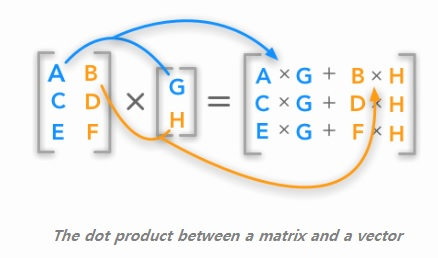

Dot products are useful in a wide range of contexts.
For example, given some set of values,
denoted by a vector $\mathbf{x}  \in \mathbb{R}^n$
and a set of weights denoted by $\mathbf{w} \in \mathbb{R}^n$,
the weighted sum of the values in $\mathbf{x}$
according to the weights $\mathbf{w}$
could be expressed as the dot product $\mathbf{x}^\top \mathbf{w}$.
When the weights are non-negative
and sum to one, i.e., $\left(\sum_{i=1}^{n} {w_i} = 1\right)$,
the dot product expresses a *weighted average*.
After normalizing two vectors to have unit length,
the dot products express the cosine of the angle between them.
Later in this section, we will formally introduce this notion of *length*.


## Matrix-Vector Products

Now that we know how to calculate dot products,
we can begin to understand the *product*
between an $m \times n$ matrix $\mathbf{A}$
and an $n$-dimensional vector $\mathbf{x}$.
To start off, we visualize our matrix
in terms of its row vectors

$$\mathbf{A}=
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_m \\
\end{bmatrix},$$

where each $\mathbf{a}^\top_{i} \in \mathbb{R}^n$
is a row vector representing the $i^\mathrm{th}$ row
of the matrix $\mathbf{A}$.

[**The matrix-vector product $\mathbf{A}\mathbf{x}$
is simply a column vector of length $m$,
whose $i^\mathrm{th}$ element is the dot product
$\mathbf{a}^\top_i \mathbf{x}$:**]

$$
\mathbf{A}\mathbf{x}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_m \\
\end{bmatrix}\mathbf{x}
= \begin{bmatrix}
 \mathbf{a}^\top_{1} \mathbf{x}  \\
 \mathbf{a}^\top_{2} \mathbf{x} \\
\vdots\\
 \mathbf{a}^\top_{m} \mathbf{x}\\
\end{bmatrix}.
$$

We can think of multiplication with a matrix
$\mathbf{A}\in \mathbb{R}^{m \times n}$
as a transformation that projects vectors
from $\mathbb{R}^{n}$ to $\mathbb{R}^{m}$.
These transformations are remarkably useful.
For example, we can represent rotations
as multiplications by certain square matrices.
Matrix-vector products also describe
the key calculation involved in computing
the outputs of each layer in a neural network
given the outputs from the previous layer.


To express a matrix-vector product in code,
we use the `mv` function.
Note that the column dimension of `A`
(its length along axis 1)
must be the same as the dimension of `x` (its length).
PyTorch has a convenience operator `@`
that can execute both matrix-vector
and matrix-matrix products
(depending on its arguments).
Thus we can write `A@x`.


In [31]:
A.shape, x.shape, torch.mv(A, x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

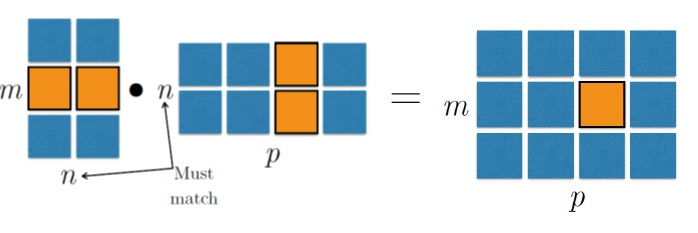

## Matrix-Matrix Multiplication

If you have gotten the hang of dot products and matrix-vector products,
then *matrix-matrix multiplication* should be straightforward.

Say that we have two matrices
$\mathbf{A} \in \mathbb{R}^{n \times k}$
and $\mathbf{B} \in \mathbb{R}^{k \times m}$:

$$\mathbf{A}=\begin{bmatrix}
 a_{11} & a_{12} & \cdots & a_{1k} \\
 a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nk} \\
\end{bmatrix},\quad
\mathbf{B}=\begin{bmatrix}
 b_{11} & b_{12} & \cdots & b_{1m} \\
 b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 b_{k1} & b_{k2} & \cdots & b_{km} \\
\end{bmatrix}.$$


Let $\mathbf{a}^\top_{i} \in \mathbb{R}^k$ denote
the row vector representing the $i^\mathrm{th}$ row
of the matrix $\mathbf{A}$
and let $\mathbf{b}_{j} \in \mathbb{R}^k$ denote
the column vector from the $j^\mathrm{th}$ column
of the matrix $\mathbf{B}$:

$$\mathbf{A}=
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix},
\quad \mathbf{B}=\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}.
$$


To form the matrix product $\mathbf{C} \in \mathbb{R}^{n \times m}$,
we simply compute each element $c_{ij}$
as the dot product between
the $i^{\mathrm{th}}$ row of $\mathbf{A}$
and the $j^{\mathrm{th}}$ column of $\mathbf{B}$,
i.e., $\mathbf{a}^\top_i \mathbf{b}_j$:

$$\mathbf{C} = \mathbf{AB} = \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix}
\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \mathbf{b}_1 & \mathbf{a}^\top_{1}\mathbf{b}_2& \cdots & \mathbf{a}^\top_{1} \mathbf{b}_m \\
 \mathbf{a}^\top_{2}\mathbf{b}_1 & \mathbf{a}^\top_{2} \mathbf{b}_2 & \cdots & \mathbf{a}^\top_{2} \mathbf{b}_m \\
 \vdots & \vdots & \ddots &\vdots\\
\mathbf{a}^\top_{n} \mathbf{b}_1 & \mathbf{a}^\top_{n}\mathbf{b}_2& \cdots& \mathbf{a}^\top_{n} \mathbf{b}_m
\end{bmatrix}.
$$

[**We can think of the matrix-matrix multiplication $\mathbf{AB}$
as performing $m$ matrix-vector products
or $m \times n$ dot products
and stitching the results together
to form an $n \times m$ matrix.**]
In the following snippet,
we perform matrix multiplication on `A` and `B`.
Here, `A` is a matrix with 2 rows and 3 columns,
and `B` is a matrix with 3 rows and 4 columns.
After multiplication, we obtain a matrix with 2 rows and 4 columns.


In [32]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

The term *matrix-matrix multiplication* is
often simplified to *matrix multiplication*,
and should not be confused with the Hadamard product.


## Norms

Some of the most useful operators in linear algebra are *norms*.

**Informally, the norm of a vector tells us how *big* it is.**

For instance, the $\ell_2$ norm measures
the (Euclidean) length of a vector.
Here, we are employing a notion of *size* that concerns the magnitude of a vector's components
(not its dimensionality).

A norm is a function $\| \cdot \|$ that maps a vector
to a scalar and satisfies the following three properties:

1. Given any vector $\mathbf{x}$, if we scale (all elements of) the vector
   by a scalar $\alpha \in \mathbb{R}$, its norm scales accordingly:
   $$\|\alpha \mathbf{x}\| = |\alpha| \|\mathbf{x}\|.$$
2. For any vectors $\mathbf{x}$ and $\mathbf{y}$:
   norms satisfy the triangle inequality:
   $$\|\mathbf{x} + \mathbf{y}\| \leq \|\mathbf{x}\| + \|\mathbf{y}\|.$$
3. The norm of a vector is nonnegative and it only vanishes if the vector is zero:
   $$\|\mathbf{x}\| > 0 \text{ for all } \mathbf{x} \neq 0.$$

Many functions are valid norms and different norms
encode different notions of size.
The Euclidean norm that we all learned in elementary school geometry
when calculating the hypotenuse of right triangle
is the square root of the sum of squares of a vector's elements.
Formally, this is called [**the $\ell_2$ *norm***] and expressed as

(**$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2}.$$**)

The method `norm` calculates the $\ell_2$ norm.


In [33]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

[**The $\ell_1$ norm**] is also popular
and the associated metric is called the Manhattan distance.
By definition, the $\ell_1$ norm sums
the absolute values of a vector's elements:

(**$$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|.$$**)

Compared to the $\ell_2$ norm, it is less sensitive to outliers.
To compute the $\ell_1$ norm,
we compose the absolute value
with the sum operation.


In [34]:
torch.abs(u).sum()

tensor(7.)

Both the $\ell_2$ and $\ell_1$ norms are special cases
of the more general $\ell_p$ *norms*:

$$\|\mathbf{x}\|_p = \left(\sum_{i=1}^n \left|x_i \right|^p \right)^{1/p}.$$

In the case of matrices, matters are more complicated.
After all, matrices can be viewed both as collections of individual entries
*and* as objects that operate on vectors and transform them into other vectors.
For instance, we can ask by how much longer
the matrix-vector product $\mathbf{X} \mathbf{v}$
could be relative to $\mathbf{v}$.
This line of thought leads to a norm called the *spectral* norm.
For now, we introduce [**the *Frobenius norm*,
which is much easier to compute**] and defined as
the square root of the sum of the squares
of a matrix's elements:

[**$$\|\mathbf{X}\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}.$$**]

The Frobenius norm behaves as if it were
an $\ell_2$ norm of a matrix-shaped vector.
Invoking the following function will calculate
the Frobenius norm of a matrix.


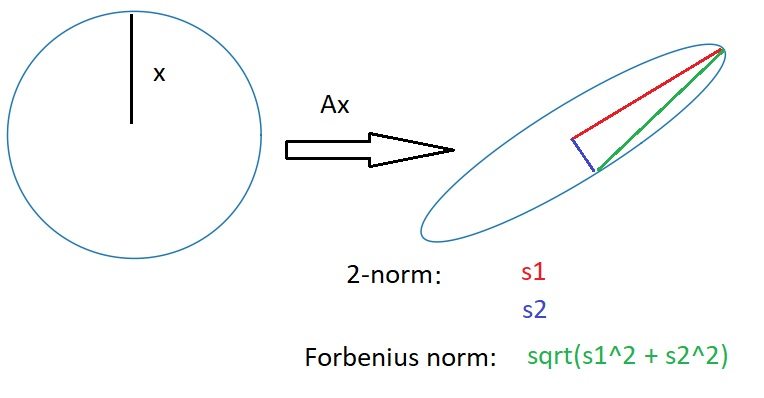

Image from: https://math.stackexchange.com/questions/33083/what-is-the-difference-between-the-frobenius-norm-and-the-2-norm-of-a-matrix

In [35]:
torch.norm(torch.ones((4, 9)))

tensor(6.)